In [2]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from math import *

# Riddler Express
You and your friend are playing a game of “Acchi, Muite, Hoi” (or what some on Twitter have been calling the “lookaway challenge”). In the first round, you point in one of four directions: up, down, left or right. At the exact same time, your friend also looks in one of those four directions. If your friend looks in the same direction you’re pointing, you win! Otherwise, you switch roles as the game continues to the next round — now your friend points in a direction and you try to look away. As long as no one wins, you keep switching off who points and who looks.

It seems like your chances of winning should be 50 percent, since there are exactly two players. But surely it’s not that simple. If both you and your friend choose your directions randomly in each round, what are your chances of winning?

## Solution
- Probability of A winning game 1: $0$, Probability of B winning game 1: $1/4$
- Probability of A winning game 2: $1/4\cdot3/4$, Probability of B winning game 2: $0$
- Probability of A winning game 3: $0$, Probability of B winning game 2: $1/4\cdot3/4\cdot3/4$
- etc.

Therefore, probability of A winning is $\dfrac{1}{4}\left(\dfrac{3}{4} + \dfrac{3^3}{4^3} + \dfrac{3^5}{4^5} + ...\right)
= \dfrac{3}{16}\left(1 + \dfrac{9}{16} + \dfrac{9^2}{16^2} + ...\right) = \dfrac{3}{16}\left(\dfrac{1}{1-\frac{9}{16}}\right) = \dfrac{3}{16}\cdot\dfrac{16}{7} = \dfrac{3}{7}$


Equivalently: If $X$ is the probability of winning when you start as the pointer, then the following equation holds:
$$X = \dfrac{1}{4}\cdot0 + \dfrac{3}{4}\cdot(1-X) \Rightarrow X = \dfrac{3}{4} - \dfrac{3}{4}X \Rightarrow \dfrac{7}{4}X = \dfrac{3}{4} \Rightarrow X = \dfrac{3}{7}$$

Equivalently: Let X be the win probability when you start as the pointer. Since you start as pointer on the first round, there is a 1/4 chance your opponent immediately wins (your win probability becomes 0) and a 3/4 chance you become the looker in the second round (your win probability becomes 1-X). Thus, X = 1/4\*0 + 3/4\*(1-X), which is solved by X = 3/7.

# Classic
The U.S. Open is upon us! Dave Moran and Erich Friedman each submitted a tennis-themed puzzle that asked what it really takes to succeed in the tournament.

Suppose you’re playing a match at the U.S. Open, and you’re slightly better than the competition: your chances of winning any given point are exactly 55 percent. (Yes, most players are more likely to win the points they serve, but we’re simplifying things a bit.) What are your chances of winning a three-set match, as played by the women, or a five-set match, as played by the men? And what are your chances of winning the whole tournament (seven consecutive matches)?

If you’re not familiar with the scoring system in tennis, you can read more about it here. In short, the first to 4 points wins a game (as long as they’ve won 2 more points than their opponent), the first to six games wins a set (as long as they’ve won two more games), and the first to two sets (for women) or three sets (for men) wins the match. If at any point a set is tied at six games apiece, that set is decided by a tiebreaker, in which the first to 7 points wins (with the same 2-point margin rule applying here).

You know, I thought tennis scoring was pretty straightforward until I had to write it down.

## Solution

In [3]:
class TennisGame:
    def __init__(self, p_win_one_point, points_to_win, verbose=False):
        self.p_win_one_point = p_win_one_point
        self.p_lose_one_point = 1-self.p_win_one_point
        self.points_to_win = points_to_win
        self.verbose = verbose
        self.memo = {}
        
        # Deuce game: X = p**2 * 1 + 2p(1-p) * X + (1-p)**2 * 0
        self.p_win_from_deuce = self.p_win_one_point**2 / (1-2*self.p_win_one_point*self.p_lose_one_point)
    
    def p_win_intermediate(self, pts1, pts2):
        score = (pts1, pts2)
        
        if score in self.memo:
            return self.memo[score]

        if pts1 >= self.points_to_win and pts2 <= pts1-2:
            self.memo[score] = 1
            return self.memo[score]

        if pts2 >= self.points_to_win and pts1 <= pts2-2:
            self.memo[score] = 0
            return self.memo[score]

        if pts1 == self.points_to_win-1 and pts2 == self.points_to_win-1:
            self.memo[score] = self.p_win_from_deuce
            return self.memo[score]

        self.memo[score] = self.p_win_one_point * self.p_win_intermediate(pts1+1, pts2) + self.p_lose_one_point * self.p_win_intermediate(pts1, pts2+1)
        if self.verbose:
            print(f'Probability of winning {pts1}-{pts2} game: {self.memo[score]}')
        return self.memo[score]
    
    def p_win(self):
        return self.p_win_intermediate(0, 0)

In [4]:
game = TennisGame(p_win_one_point=0.55, points_to_win=4, verbose=True)
print(game.p_win())

Probability of winning 3-2 game: 0.8195544554455446
Probability of winning 3-1 game: 0.9187995049504951
Probability of winning 3-0 game: 0.9634597772277228
Probability of winning 2-3 game: 0.3294554455445545
Probability of winning 2-2 game: 0.5990099009900991
Probability of winning 2-1 game: 0.7748941831683169
Probability of winning 2-0 game: 0.8786052599009901
Probability of winning 1-3 game: 0.181200495049505
Probability of winning 1-2 game: 0.41099566831683176
Probability of winning 1-1 game: 0.6111398514851486
Probability of winning 1-0 game: 0.7582458261138614
Probability of winning 0-3 game: 0.09966027227722776
Probability of winning 0-2 game: 0.27089474009901
Probability of winning 0-1 game: 0.45802955136138623
Probability of winning 0-0 game: 0.6231485024752476
0.6231485024752476


In [5]:
class TennisSet:
    def __init__(self, p_win_one_point, points_to_win_game, games_to_win_set, verbose=False):
        self.p_win_one_point = p_win_one_point
        self.points_to_win_game = points_to_win_game
        self.games_to_win_set = games_to_win_set
        self.verbose = verbose
        self.memo = {}
        
        self.game = TennisGame(self.p_win_one_point, self.points_to_win_game)
        self.p_win_one_game = self.game.p_win()
    
    def p_win_intermediate(self, pts1, pts2):
        score = (pts1, pts2)
        
        if score in self.memo:
            return self.memo[score]

        if pts1 >= self.games_to_win_set and pts2 <= pts1-2:
            self.memo[score] = 1
            return self.memo[score]

        if pts2 >= self.games_to_win_set and pts1 <= pts2-2:
            self.memo[score] = 0
            return self.memo[score]

        if pts1 == self.games_to_win_set and pts2 == self.games_to_win_set:
            self.tiebreak = TennisGame(points_to_win=7, p_win_one_point=self.p_win_one_point)
            self.memo[score] = self.tiebreak.p_win()
            return self.memo[score]

        self.memo[score] = self.p_win_one_game * self.p_win_intermediate(pts1+1, pts2) + (1-self.p_win_one_game) * self.p_win_intermediate(pts1, pts2+1)
        if self.verbose:
            print(f'Probability of winning {pts1}-{pts2} set: {self.memo[score]}')
        return self.memo[score]
    
    def p_win(self):
        return self.p_win_intermediate(0, 0)

In [6]:
tennis_set = TennisSet(p_win_one_point=0.55, points_to_win_game=4, games_to_win_set=6, verbose=True)
print(tennis_set.p_win())

Probability of winning 6-5 set: 0.8696661986937584
Probability of winning 5-6 set: 0.40763307096085805
Probability of winning 5-5 set: 0.6955483226015696
Probability of winning 5-4 set: 0.8852669294484787
Probability of winning 5-3 set: 0.9567626705470461
Probability of winning 5-2 set: 0.9837059476466832
Probability of winning 5-1 set: 0.9938595619699058
Probability of winning 5-0 set: 0.997685966732901
Probability of winning 4-5 set: 0.4334298956283385
Probability of winning 4-4 set: 0.7149914666162167
Probability of winning 4-3 set: 0.8656508302873507
Probability of winning 4-2 set: 0.9392166998793583
Probability of winning 4-1 set: 0.9732673175620445
Probability of winning 4-0 set: 0.9884837622253322
Probability of winning 3-5 set: 0.27009119038880197
Probability of winning 3-4 set: 0.5473301312707395
Probability of winning 3-3 set: 0.7456911981698148
Probability of winning 3-2 set: 0.8662863247508878
Probability of winning 3-1 set: 0.9329513702144754
Probability of winning 3-0 set

In [7]:
class TennisMatch:
    def __init__(self, p_win_one_point, points_to_win_game, games_to_win_set, sets_to_win_match, verbose=False):
        self.p_win_one_point = p_win_one_point
        self.points_to_win_game = points_to_win_game
        self.games_to_win_set = games_to_win_set
        self.sets_to_win_match = sets_to_win_match
        self.verbose = verbose
        self.memo = {}
        
        self.tennisSet = TennisSet(self.p_win_one_point, self.points_to_win_game, self.games_to_win_set)
        self.p_win_one_set = self.tennisSet.p_win()
    
    def p_win_intermediate(self, pts1, pts2):
        score = (pts1, pts2)
        
        if score in self.memo:
            return self.memo[score]

        if pts1 >= self.sets_to_win_match:
            self.memo[score] = 1
            return self.memo[score]

        if pts2 >= self.sets_to_win_match:
            self.memo[score] = 0
            return self.memo[score]

        self.memo[score] = self.p_win_one_set * self.p_win_intermediate(pts1+1, pts2) + (1-self.p_win_one_set) * self.p_win_intermediate(pts1, pts2+1)
        if self.verbose:
            print(f'Probability of winning {pts1}-{pts2} match: {self.memo[score]}')
        return self.memo[score]
    
    def p_win(self):
        return self.p_win_intermediate(0, 0)

In [8]:
%%time
mens_tennis_match = TennisMatch(p_win_one_point=0.55, 
                                points_to_win_game=4, 
                                games_to_win_set=6, 
                                sets_to_win_match=3, 
                                verbose=True)
print(f'Probability of winning men\'s match: {mens_tennis_match.p_win()*100:.7f}%')

Probability of winning 2-2 match: 0.8150419926646899
Probability of winning 2-1 match: 0.9657905355225513
Probability of winning 2-0 match: 0.993672685618243
Probability of winning 1-2 match: 0.6642934498068285
Probability of winning 1-1 match: 0.910026235331168
Probability of winning 1-0 match: 0.9782016048524735
Probability of winning 0-2 match: 0.5414270570446587
Probability of winning 0-1 match: 0.8418508658098625
Probability of winning 0-0 match: 0.9529824438604554
Probability of winning men's match: 95.2982444%
CPU times: user 1.26 ms, sys: 508 µs, total: 1.77 ms
Wall time: 1.41 ms


In [9]:
%%time
womens_tennis_match = TennisMatch(p_win_one_point=0.55, 
                                  points_to_win_game=4, 
                                  games_to_win_set=6, 
                                  sets_to_win_match=2, 
                                  verbose=True)
print(f'Probability of winning women\'s match: {womens_tennis_match.p_win()*100:.7f}%')

Probability of winning 1-1 match: 0.8150419926646899
Probability of winning 1-0 match: 0.9657905355225513
Probability of winning 0-1 match: 0.6642934498068285
Probability of winning 0-0 match: 0.910026235331168
Probability of winning women's match: 91.0026235%
CPU times: user 645 µs, sys: 153 µs, total: 798 µs
Wall time: 665 µs


In [10]:
print(f'Probability of winning men\'s tournament: {mens_tennis_match.p_win()**7*100:.7f}%')
print(f'Probability of winning women\'s tournament: {womens_tennis_match.p_win()**7*100:.7f}%')

Probability of winning men's tournament: 71.3829185%
Probability of winning women's tournament: 51.6865316%


In [12]:
%%time
p_win_mens_match, p_win_womens_match = {}, {}
for p_win_one_point in np.linspace(0,1,1000):
    mens_tennis_match = TennisMatch(p_win_one_point=p_win_one_point, 
                                    points_to_win_game=4, 
                                    games_to_win_set=6, 
                                    sets_to_win_match=3)
    p_win_mens_match[p_win_one_point] = mens_tennis_match.p_win()
    
    womens_tennis_match = TennisMatch(p_win_one_point=p_win_one_point, 
                                      points_to_win_game=4, 
                                      games_to_win_set=6, 
                                      sets_to_win_match=2)
    p_win_womens_match[p_win_one_point] = womens_tennis_match.p_win()

CPU times: user 432 ms, sys: 3.99 ms, total: 436 ms
Wall time: 445 ms


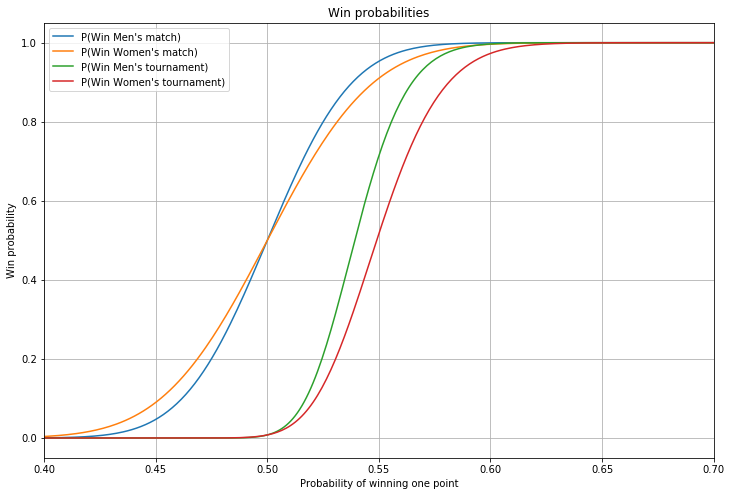

In [23]:
plt.figure(figsize=(12,8))
plt.plot(p_win_mens_match.keys(), p_win_mens_match.values(), label='P(Win Men\'s match)')
plt.plot(p_win_womens_match.keys(), p_win_womens_match.values(), label='P(Win Women\'s match)')
plt.plot(p_win_mens_match.keys(), [i**7 for i in p_win_mens_match.values()], label='P(Win Men\'s tournament)')
plt.plot(p_win_womens_match.keys(), [i**7 for i in p_win_womens_match.values()], label='P(Win Women\'s tournament)')
plt.grid()
plt.xlabel('Probability of winning one point')
plt.ylabel('Win probability')
plt.title('Win probabilities')
plt.legend(loc='best')
plt.xlim(0.4, 0.7)
plt.show()